<a href="https://colab.research.google.com/github/MOULIK-RAZDAN/LOGISTIC-REGRESSION/blob/main/Logistic_Regression_for_rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets 

In [2]:
import opendatasets as op

In [3]:
help(op)

Help on package opendatasets:

NAME
    opendatasets

PACKAGE CONTENTS
    _version
    datasets (package)
    utils (package)

FUNCTIONS
    download(dataset_id_or_url, data_dir='.', force=False, dry_run=False, **kwargs)
    
    version()

VERSION
    0.1.20

FILE
    /usr/local/lib/python3.7/dist-packages/opendatasets/__init__.py




In [4]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [5]:
op.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moulikrazdan
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 199MB/s]

In [6]:
data_dir = '/content/weather-dataset-rattle-package'

In [7]:
import os
os.listdir(data_dir)

['weatherAUS.csv']

In [8]:
train_csv = data_dir + '/weatherAUS.csv'

In [9]:
import pandas as pd
df =  pd.read_csv(train_csv)

In [10]:
df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
df.describe()

MinTemp        MaxTemp  ...        Temp9am       Temp3pm
count  143975.000000  144199.000000  ...  143693.000000  141851.00000
mean       12.194034      23.221348  ...      16.990631      21.68339
std         6.398495       7.119049  ...       6.488753       6.93665
min        -8.500000      -4.800000  ...      -7.200000      -5.40000
25%         7.600000      17.900000  ...      12.300000      16.60000
50%        12.000000      22.600000  ...      16.700000      21.10000
75%        16.900000      28.200000  ...      21.600000      26.40000
max        33.900000      48.100000  ...      40.200000      46.70000

[8 rows x 16 columns]

We will Drop the NAN values from RainTomorrow and RainToday as RainTomorrow is our output and we cannot have NAN values in our output and RainToday will affect the output of RainTomorrow values, That is why the NAN values of RainTodayis also deleted.

In [13]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [14]:
df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145454  2017-06-20    Uluru      3.5  ...     20.9         No            No
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No

[140787 rows x 23 columns]

#EXPLORARTORY DATA ANALYSIS AND VISUALIZATION

In [15]:
pip install plotly

In [16]:
import plotly.express as px
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['figure.facecolor']  ='#00000000'

In [18]:
df.Location.nunique()

49

In [19]:
px.histogram(df, x = 'Location',title = 'Location vs Rainy Days', color = 'RainToday')

In [20]:
px.histogram(df,x = 'Humidity3pm',title= 'Humidity at 3PM vs Rainy days ', color ='RainToday' )

In [21]:
px.histogram(df,x ='Temp3pm', title = 'Temperature vs Rainy days', color = 'RainTomorrow')

In [22]:
px.scatter(df.sample(1000),x ='Temp3pm',y = 'Humidity3pm', title  = " Temperature at 3PM vs Humidity at 3 PM", color  = 'RainTomorrow')

In [23]:
px.histogram(df,x = 'RainTomorrow',title  = "Rain Tomorrow vs Rain Today", color = 'RainToday')

In [24]:
px.scatter(df.sample(1000),x ='MaxTemp',y = 'MinTemp', title  = " Maximum Temperature  vs Minimum Temperature", color  = 'RainTomorrow')

#Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set -** used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

2. **Validation set -** used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.

3. **Test set -** used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.



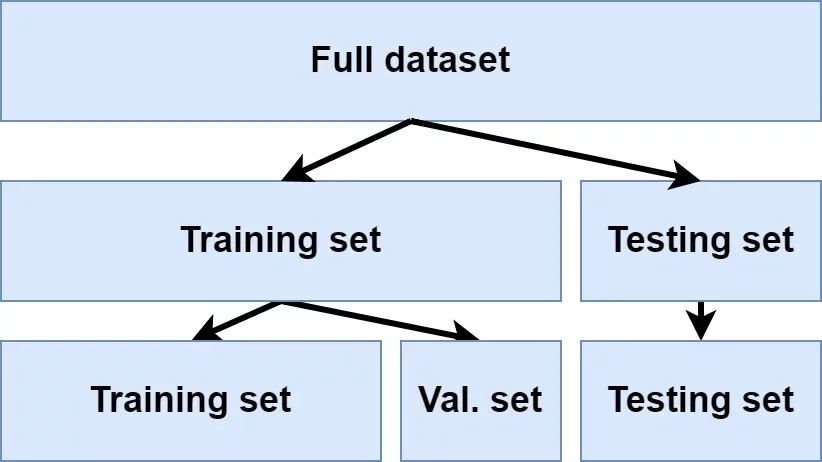

We can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.(for smaller datasets upto 100000 examples)

In [25]:
from sklearn.model_selection import train_test_split

In [29]:
train_val_df,test_df = train_test_split(df,test_size = 0.2,random_state = 42)
train_df, val_df = train_test_split(train_val_df,test_size = 0.25, random_state = 42)

In [32]:
print('train_df',train_df.shape)
print('val_df',val_df.shape)
print('test_df',test_df.shape)

train_df (84471, 23)
val_df (28158, 23)
test_df (28158, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.


In [45]:
df.Date

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145454    2017-06-20
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
Name: Date, Length: 140787, dtype: object

In [ ]:
fig =px.histogram(df, pd.to_datetime(df.Date).dt.year,nbins=11 )
fig.update_layout(bargap = 0.2)

In [46]:
year  = pd.to_datetime(df.Date).dt.year

In [47]:
train_df = df[year <2015]
val_df = df[year == 2015]
test_df = df[year >2015]

In [ ]:
train_df

In [ ]:
val_df

In [ ]:
test_df